In [1]:
#importações das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import json

In [2]:
#importação das planilhas csv para serem dataframes
df1000 = pd.read_csv("dataset_sudeste_relacionados_outliers_1K.csv")

In [3]:
df1000.columns.tolist() #listar colunas de tabela de 1000 linhas

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

In [4]:
# Tratamento de NaN(nulos) - converter para 0 - tabela de 100 linhas
df1000['idade'] = df1000['idade'].fillna(0)
df1000['renda'] = df1000['renda'].fillna(0)
df1000['cidade'] = df1000['cidade'].fillna(0)
df1000['categoria'] = df1000['categoria'].fillna(0)
df1000['nota'] = df1000['nota'].fillna(0)
df1000['feedback'] = df1000['feedback'].fillna(0)

In [5]:
#feedbackisualização de tabela tratada de 1000 linhas
display(df1000.head(1000))

,id,idade,renda,cidade,categoria,nota,feedback
0,1,58,8170.89,São Paulo,A,8.4,Bom
1,2,41,1574.11,São Paulo,B,6.7,Bom
2,3,79,16745.92,São Paulo,A,6.8,Bom
3,4,79,30742.92,Vitória,A,7.4,Bom
4,5,60,27694.04,Vitória,A,7.1,Bom
...,...,...,...,...,...,...,...
995,996,38,44862.28,Belo Horizonte,A,7.7,Bom
996,997,56,34306.80,Belo Horizonte,B,9.1,Bom
997,998,30,32088.55,Belo Horizonte,B,7.2,Bom
998,999,80,10832.60,Belo Horizonte,A,5.5,Bom


In [6]:
# Média, mínimo, máximo, quartis, margem de erro, contagem
print("\n### Descrição Estatística 1000###")
print(df1000.describe())


### Descrição Estatística 1000###
                id        idade         renda         nota
count  1000.000000  1000.000000   1000.000000  1000.000000
mean    500.500000    49.573000  24060.805410     7.406600
std     288.819436    19.385987  13867.493592     1.564149
min       1.000000     8.000000   1025.710000     0.200000
25%     250.750000    33.000000  12293.352500     6.100000
50%     500.500000    50.000000  23762.440000     7.400000
75%     750.250000    66.000000  35709.882500     8.700000
max    1000.000000   114.000000  91421.570000    10.000000


In [7]:
# Cálculos Estatísticos de idade
media_idade1000 = sum(df1000['idade'])/len(df1000['idade'])
mediana_idade1000 = df1000['idade'].median()
desvio_padrao_idade1000 = df1000['idade'].std()
maximo_idade1000 = df1000['idade'].max()
minimo_idade1000 = df1000['idade'].min()

print('Média de Idade - 1000 Elementos:',round(media_idade1000,0))
print('Mediana de Idade - 1000 Elementos:',round(mediana_idade1000,0))
print('Desvio Padrão de Idade - 1000 Elementos:',round(desvio_padrao_idade1000,0))
print('Maior Valor de Idade - 1000 Elementos:',round(maximo_idade1000,0))
print('Menor Valor de Idade - 1000 Elementos:',round(minimo_idade1000,0))

Média de Idade - 1000 Elementos: 50.0
Mediana de Idade - 1000 Elementos: 50.0
Desvio Padrão de Idade - 1000 Elementos: 19.0
Maior Valor de Idade - 1000 Elementos: 114
Menor Valor de Idade - 1000 Elementos: 8


In [8]:
# Cálculos Estatísticos de renda
media_renda1000 = sum(df1000['renda'])/len(df1000['renda'])
mediana_renda1000 = df1000['renda'].median()
desvio_padrao_renda1000 = df1000['renda'].std()
maximo_renda1000 = df1000['renda'].max()
minimo_renda1000 = df1000['renda'].min()

print('Média de Renda - 1000 Elementos:',round(media_renda1000,2))
print('Mediana de Renda - 1000 Elementos:',round(mediana_renda1000,2))
print('Desvio Padrão de Renda - 1000 Elementos:',round(desvio_padrao_renda1000,2))
print('Maior Valor de Renda - 1000 Elementos:',round(maximo_renda1000,2))
print('Menor Valor de Renda - 1000 Elementos:',round(minimo_renda1000,2))

Média de Renda - 1000 Elementos: 24060.81
Mediana de Renda - 1000 Elementos: 23762.44
Desvio Padrão de Renda - 1000 Elementos: 13867.49
Maior Valor de Renda - 1000 Elementos: 91421.57
Menor Valor de Renda - 1000 Elementos: 1025.71


In [9]:
# Cálculos Estatísticos de nota
media_nota1000 = sum(df1000['nota'])/len(df1000['nota'])
mediana_nota1000 = df1000['nota'].median()
desvio_padrao_nota1000 = df1000['nota'].std()
maximo_nota1000 = df1000['nota'].max()
minimo_nota1000 = df1000['nota'].min()

print('Média de Nota - 1000 Elementos:',round(media_nota1000,2))
print('Mediana de Nota - 1000 Elementos:',round(mediana_nota1000,2))
print('Desvio Padrão de Nota - 1000 Elementos:',round(desvio_padrao_nota1000,2))
print('Maior Valor de Nota - 1000 Elementos:',round(maximo_nota1000,2))
print('Menor Valor de Nota - 1000 Elementos:',round(minimo_nota1000,2))

Média de Nota - 1000 Elementos: 7.41
Mediana de Nota - 1000 Elementos: 7.4
Desvio Padrão de Nota - 1000 Elementos: 1.56
Maior Valor de Nota - 1000 Elementos: 10.0
Menor Valor de Nota - 1000 Elementos: 0.2


In [10]:
#Calculando o IQR e identificando os limites - Renda
Q1_renda1000 = df1000['renda'].quantile(0.25)
Q3_renda1000 = df1000['renda'].quantile(0.75)
IQR_renda1000 = Q3_renda1000 - Q1_renda1000
limite_inferior_renda1000 = Q1_renda1000 - 1.5 * IQR_renda1000
limite_superior_renda1000 = Q3_renda1000 + 1.5 * IQR_renda1000

print (f"\n\n\t IQR - Campo Renda - 1000\n\n")
print(f"Quartis -> Q1: {Q1_renda1000:-8.2f}  ->  Q3: {Q3_renda1000:-8.2f}")
print(f"IQR ----- {IQR_renda1000}")
print(f"Limites - Inf: {limite_inferior_renda1000:-8.2f}  -> Sup: {limite_superior_renda1000:-8.2f}")



	 IQR - Campo Renda - 1000


Quartis -> Q1: 12293.35  ->  Q3: 35709.88
IQR ----- 23416.53
Limites - Inf: -22831.44  -> Sup: 70834.68


In [11]:
#Calculando o IQR e identificando os limites - Idade
Q1_idade1000 = df1000['idade'].quantile(0.25)
Q3_idade1000 = df1000['idade'].quantile(0.75)
IQR_idade1000 = Q3_idade1000 - Q1_idade1000
limite_inferior_idade1000 = Q1_idade1000 - 1.5 * IQR_idade1000
limite_superior_idade1000 = Q3_idade1000 + 1.5 * IQR_idade1000

print (f"\n\n\t IQR - Campo Idade - 1000\n\n")
print(f"Quartis -> Q1: {Q1_idade1000:-8.2f}  ->  Q3: {Q3_idade1000:-8.2f}")
print(f"IQR ----- {IQR_idade1000}")
print(f"Limites - Inf: {limite_inferior_idade1000:-8.2f}  -> Sup: {limite_superior_idade1000:-8.2f}")



	 IQR - Campo Idade - 1000


Quartis -> Q1:    33.00  ->  Q3:    66.00
IQR ----- 33.0
Limites - Inf:   -16.50  -> Sup:   115.50


In [12]:
#Calculando o IQR e identificando os limites - Nota
Q1_nota1000 = df1000['nota'].quantile(0.25)
Q3_nota1000 = df1000['nota'].quantile(0.75)
IQR_nota1000 = Q3_nota1000 - Q1_nota1000
limite_inferior_nota1000 = Q1_nota1000 - 1.5 * IQR_nota1000
limite_superior_nota1000 = Q3_nota1000 + 1.5 * IQR_nota1000

print (f"\n\n\t IQR - Campo Nota - 1000\n\n")
print(f"Quartis -> Q1: {Q1_nota1000:-8.2f}  ->  Q3: {Q3_nota1000:-8.2f}")
print(f"IQR ----- {IQR_nota1000}")
print(f"Limites - Inf: {limite_inferior_nota1000:-8.2f}  -> Sup: {limite_superior_nota1000:-8.2f}")



	 IQR - Campo Nota - 1000


Quartis -> Q1:     6.10  ->  Q3:     8.70
IQR ----- 2.5999999999999996
Limites - Inf:     2.20  -> Sup:    12.60


In [13]:
#Outliers Renda
outliers_renda1000 = df1000[(df1000['renda'] < limite_inferior_renda1000) | (df1000['renda'] > limite_superior_renda1000)]
print(f"\n### Possíveis Outliers em 'renda' - 1000 Elementos###\n\n{outliers_renda1000}\n\n\n")


### Possíveis Outliers em 'renda' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
235  236    113  87936.05  Belo Horizonte         B   2.0      Bom
251  252     95  89393.75         Vitória         A   4.3      Bom
494  495     15  90902.54         Vitória         A   4.2      Bom
886  887     85  91421.57  Rio de Janeiro         A   1.0      Bom
964  965     84  87218.18         Vitória         A   2.2      Bom





In [14]:
#Outliers Idade
outliers_idade1000 = df1000[(df1000['idade'] < limite_inferior_idade1000) | (df1000['idade'] > limite_superior_idade1000)]
print(f"\n### Possíveis Outliers em 'idade' - 1000 Elementos###\n\n{outliers_idade1000}\n\n\n")


### Possíveis Outliers em 'idade' - 1000 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [15]:
#Outliers Nota
outliers_nota1000 = df1000[(df1000['nota'] < limite_inferior_nota1000) | (df1000['nota'] > limite_superior_nota1000)]
print(f"\n### Possíveis Outliers em 'nota' - 1000 Elementos###\n\n{outliers_nota1000}\n\n\n")


### Possíveis Outliers em 'nota' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
235  236    113  87936.05  Belo Horizonte         B   2.0      Bom
310  311    114   1025.71  Belo Horizonte         A   1.7      Bom
861  862    113   1457.17  Rio de Janeiro         A   0.9      Bom
886  887     85  91421.57  Rio de Janeiro         A   1.0      Bom
917  918     95   1199.20         Vitória         B   0.2      Bom





In [16]:
#Conversão da planilha tratada para csv
df1000.to_csv('Relacionado1000_Tratado.csv', index=False)

In [17]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo1000 = df1000.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Relacionado1000.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo1000, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!


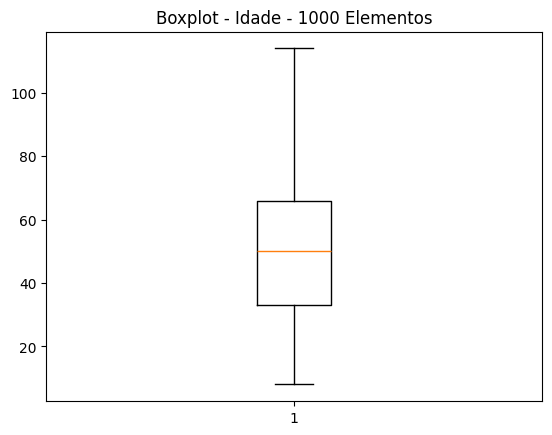

In [18]:
#Geração Gráfico - Idade - 1000 linhas
plt.boxplot(df1000['idade'])
plt.title("Boxplot - Idade - 1000 Elementos")
plt.show()

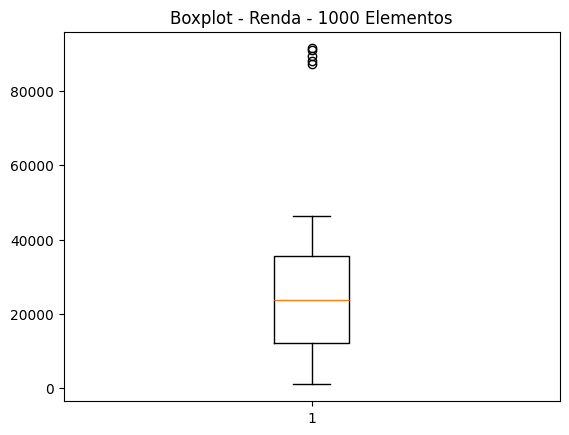

In [19]:
#Geração Gráfico - Renda - 1000 linhas
plt.boxplot(df1000['renda'])
plt.title("Boxplot - Renda - 1000 Elementos")
plt.show()

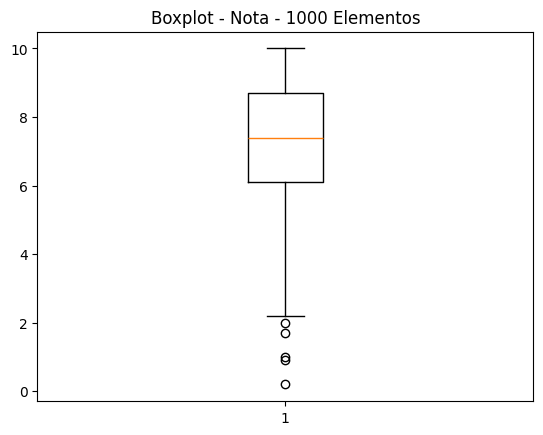

In [20]:
#Geração Gráfico - Nota - 1000 linhas
plt.boxplot(df1000['nota'])
plt.title("Boxplot - Nota - 1000 Elementos")
plt.show()